In [8]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfTransformer, CountVectorizer
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
import string, nltk
from nltk import word_tokenize
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [9]:
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [10]:
df = pd.read_csv('fake reviews dataset.csv')
df.head()

,category,rating,label,text_
0,Home_and_Kitchen_5,5.0,CG,"Love this! Well made, sturdy, and very comfor..."
1,Home_and_Kitchen_5,5.0,CG,"love it, a great upgrade from the original. I..."
2,Home_and_Kitchen_5,5.0,CG,This pillow saved my back. I love the look and...
3,Home_and_Kitchen_5,1.0,CG,"Missing information on how to use it, but it i..."
4,Home_and_Kitchen_5,5.0,CG,Very nice set. Good quality. We have had the s...


In [11]:
df.isnull().sum()

category    0
rating      0
label       0
text_       0
dtype: int64

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40432 entries, 0 to 40431
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   category  40432 non-null  object 
 1   rating    40432 non-null  float64
 2   label     40432 non-null  object 
 3   text_     40432 non-null  object 
dtypes: float64(1), object(3)
memory usage: 1.2+ MB


In [13]:
df.describe()

,rating
count,40432.000000
mean,4.256579
std,1.144354
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


In [14]:
df['rating'].value_counts()

rating
5.0    24559
4.0     7965
3.0     3786
1.0     2155
2.0     1967
Name: count, dtype: int64

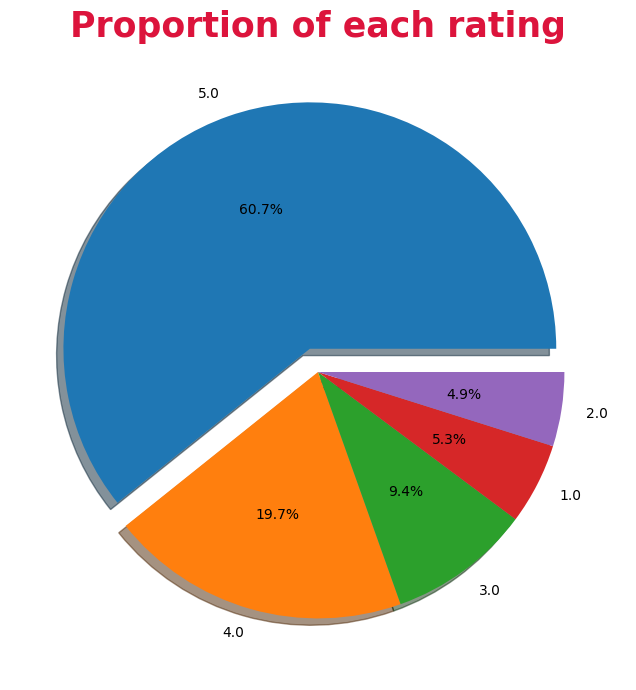

In [15]:
plt.figure(figsize=(15,8))
labels = df['rating'].value_counts().keys()
values = df['rating'].value_counts().values
explode = (0.1,0,0,0,0)
plt.pie(values,labels=labels,explode=explode,shadow=True,autopct='%1.1f%%')
plt.title('Proportion of each rating',fontweight='bold',fontsize=25,pad=20,color='crimson')
plt.show()

In [16]:
def clean_text(text):
    nopunc = [w for w in text if w not in string.punctuation]
    nopunc = ''.join(nopunc)
    return  ' '.join([word for word in nopunc.split() if word.lower() not in stopwords.words('english')])


In [17]:
!python -m nltk.downloader stopwords
df['text_'][0], clean_text(df['text_'][0])

/usr/lib/python3.10/runpy.py:126: RuntimeWarning: 'nltk.downloader' found in sys.modules after import of package 'nltk', but prior to execution of 'nltk.downloader'; this may result in unpredictable behaviour
  warn(RuntimeWarning(msg))
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


('Love this!  Well made, sturdy, and very comfortable.  I love it!Very pretty',
 'Love Well made sturdy comfortable love itVery pretty')

In [18]:
df['text_'].head().apply(clean_text)

0    Love Well made sturdy comfortable love itVery ...
1    love great upgrade original Ive mine couple years
2              pillow saved back love look feel pillow
3          Missing information use great product price
4                 nice set Good quality set two months
Name: text_, dtype: object

In [19]:
df.shape

(40432, 4)

In [20]:
#df['text_'] = df['text_'].apply(clean_text)

In [21]:
df['text_'] = df['text_'].astype(str)

In [22]:


def preprocess(text):
    return ' '.join([word for word in word_tokenize(text) if word not in stopwords.words('english') and not word.isdigit() and word not in string.punctuation])
    # Download the 'punkt' package
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [23]:
preprocess(df['text_'][4])

'Very nice set Good quality We set two months'

In [24]:
df['text_'][:10000] = df['text_'][:10000].apply(preprocess)

In [25]:
df['text_'][10001:20000] = df['text_'][10001:20000].apply(preprocess)

In [26]:
df['text_'][20001:30000] = df['text_'][20001:30000].apply(preprocess)

In [27]:
df['text_'][30001:40000] = df['text_'][30001:40000].apply(preprocess)

In [28]:
df['text_'][40001:40432] = df['text_'][40001:40432].apply(preprocess)

In [29]:
df['text_'] = df['text_'].str.lower()

In [30]:
stemmer = PorterStemmer()
def stem_words(text):
    return ' '.join([stemmer.stem(word) for word in text.split()])
df['text_'] = df['text_'].apply(lambda x: stem_words(x))

In [31]:
lemmatizer = WordNetLemmatizer()
def lemmatize_words(text):
    return ' '.join([lemmatizer.lemmatize(word) for word in text.split()])
df["text_"] = df["text_"].apply(lambda text: lemmatize_words(text))

In [32]:
df['text_'].head()

0    love well made sturdi comfort i love veri pretti
1      love great upgrad origin i 've mine coupl year
2        thi pillow save back i love look feel pillow
3               miss inform use great product price i
4         veri nice set good qualiti we set two month
Name: text_, dtype: object

In [33]:
df.to_csv('Preprocessed Fake Reviews Detection Dataset.csv')

In [34]:
def text_process(review):
    nopunc = [char for char in review if char not in string.punctuation]
    nopunc = ''.join(nopunc)
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

In [35]:
df.dropna(inplace=True)
df['length'] = df['text_'].apply(len)

In [36]:
bow_transformer=CountVectorizer(analyzer=text_process)


In [37]:
bow_transformer.fit(df["text_"])
bow_reviews = bow_transformer.transform(df['text_'])


In [40]:
def text_process(review):
    nopunc = [char for char in review if char not in string.punctuation]
    nopunc = ''.join(nopunc)
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

In [42]:
review4 = df['text_'][3]
review4

'miss inform use great product price i'

In [45]:
bow_msg4 = bow_transformer.transform([review4])
print(bow_msg4)
print(bow_msg4.shape)


  (0, 13598)	1
  (0, 15840)	1
  (0, 19848)	1
  (0, 23847)	1
  (0, 23977)	1
  (0, 32182)	1
(1, 34450)


In [47]:
feature_names = bow_transformer.get_feature_names_out()

print(feature_names[15841])
print(feature_names[23848])

informationdirect
pricecategori


In [49]:
bow_reviews = bow_transformer.transform(df['text_'])

In [50]:
print("Shape of Bag of Words Transformer for the entire reviews corpus:",bow_reviews.shape)
print("Amount of non zero values in the bag of words model:",bow_reviews.nnz)

Shape of Bag of Words Transformer for the entire reviews corpus: (40432, 34450)
Amount of non zero values in the bag of words model: 1013898


In [51]:
print("Sparsity:",np.round((bow_reviews.nnz/(bow_reviews.shape[0]*bow_reviews.shape[1]))*100,2))

Sparsity: 0.07


In [52]:
tfidf_transformer = TfidfTransformer().fit(bow_reviews)
tfidf_rev4 = tfidf_transformer.transform(bow_msg4)
print(bow_msg4)

  (0, 13598)	1
  (0, 15840)	1
  (0, 19848)	1
  (0, 23847)	1
  (0, 23977)	1
  (0, 32182)	1


In [53]:
print(tfidf_transformer.idf_[bow_transformer.vocabulary_['mango']])
print(tfidf_transformer.idf_[bow_transformer.vocabulary_['book']])

10.914254381647021
2.821709117755722


In [54]:
tfidf_reviews = tfidf_transformer.transform(bow_reviews)
print("Shape:",tfidf_reviews.shape)
print("No. of Dimensions:",tfidf_reviews.ndim)

Shape: (40432, 34450)
No. of Dimensions: 2


In [55]:
review_train, review_test, label_train, label_test = train_test_split(df['text_'],df['label'],test_size=0.35)

In [61]:
!pip install scikit-learn
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB

pipeline = Pipeline([
    ('bow',CountVectorizer(analyzer=text_process)),
    ('tfidf',TfidfTransformer()),
    ('classifier',MultinomialNB())
])

In [62]:
pipeline.fit(review_train,label_train)

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function text_process at 0x7e2e2fecab00>)),
                ('tfidf', TfidfTransformer()),
                ('classifier', MultinomialNB())])

In [64]:
predictions = pipeline.predict(review_test)
predictions

array(['OR', 'OR', 'OR', ..., 'CG', 'OR', 'CG'], dtype='<U2')

In [66]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print('Classification Report:',classification_report(label_test,predictions))
print('Confusion Matrix:',confusion_matrix(label_test,predictions))
print('Accuracy Score:',accuracy_score(label_test,predictions))

Classification Report:               precision    recall  f1-score   support

          CG       0.82      0.88      0.85      7077
          OR       0.87      0.81      0.84      7075

    accuracy                           0.84     14152
   macro avg       0.85      0.84      0.84     14152
weighted avg       0.85      0.84      0.84     14152

Confusion Matrix: [[6231  846]
 [1371 5704]]
Accuracy Score: 0.8433436970039571


In [67]:
print('Model Prediction Accuracy:',str(np.round(accuracy_score(label_test,predictions)*100,2)) + '%')

Model Prediction Accuracy: 84.33%


In [69]:
from sklearn.ensemble import RandomForestClassifier
pipeline = Pipeline([
    ('bow',CountVectorizer(analyzer=text_process)),
    ('tfidf',TfidfTransformer()),
    ('classifier',RandomForestClassifier())
])

In [70]:
pipeline.fit(review_train,label_train)

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function text_process at 0x7e2e2fecab00>)),
                ('tfidf', TfidfTransformer()),
                ('classifier', RandomForestClassifier())])

In [72]:
rfc_pred = pipeline.predict(review_test)
rfc_pred

array(['OR', 'OR', 'OR', ..., 'CG', 'OR', 'OR'], dtype=object)

In [73]:
print('Classification Report:',classification_report(label_test,rfc_pred))
print('Confusion Matrix:',confusion_matrix(label_test,rfc_pred))
print('Accuracy Score:',accuracy_score(label_test,rfc_pred))
print('Model Prediction Accuracy:',str(np.round(accuracy_score(label_test,rfc_pred)*100,2)) + '%')

Classification Report:               precision    recall  f1-score   support

          CG       0.81      0.88      0.84      7077
          OR       0.87      0.80      0.83      7075

    accuracy                           0.84     14152
   macro avg       0.84      0.84      0.84     14152
weighted avg       0.84      0.84      0.84     14152

Confusion Matrix: [[6229  848]
 [1450 5625]]
Accuracy Score: 0.8376201243640475
Model Prediction Accuracy: 83.76%


In [77]:
from sklearn.tree import DecisionTreeClassifier
pipeline = Pipeline([
    ('bow',CountVectorizer(analyzer=text_process)),
    ('tfidf',TfidfTransformer()),
    ('classifier',DecisionTreeClassifier())
])

In [78]:
pipeline.fit(review_train,label_train)

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function text_process at 0x7e2e2fecab00>)),
                ('tfidf', TfidfTransformer()),
                ('classifier', DecisionTreeClassifier())])

In [79]:
dtree_pred = pipeline.predict(review_test)
dtree_pred

array(['OR', 'OR', 'OR', ..., 'CG', 'OR', 'OR'], dtype=object)

In [80]:
print('Classification Report:',classification_report(label_test,dtree_pred))
print('Confusion Matrix:',confusion_matrix(label_test,dtree_pred))
print('Accuracy Score:',accuracy_score(label_test,dtree_pred))
print('Model Prediction Accuracy:',str(np.round(accuracy_score(label_test,dtree_pred)*100,2)) + '%')

Classification Report:               precision    recall  f1-score   support

          CG       0.74      0.74      0.74      7077
          OR       0.74      0.74      0.74      7075

    accuracy                           0.74     14152
   macro avg       0.74      0.74      0.74     14152
weighted avg       0.74      0.74      0.74     14152

Confusion Matrix: [[5240 1837]
 [1873 5202]]
Accuracy Score: 0.7378462408140192
Model Prediction Accuracy: 73.78%


In [83]:
from sklearn.svm import SVC
pipeline = Pipeline([
    ('bow',CountVectorizer(analyzer=text_process)),
    ('tfidf',TfidfTransformer()),
    ('classifier',SVC())
])

In [84]:
pipeline.fit(review_train,label_train)


Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function text_process at 0x7e2e2fecab00>)),
                ('tfidf', TfidfTransformer()), ('classifier', SVC())])

In [85]:
svc_pred = pipeline.predict(review_test)
svc_pred

array(['CG', 'OR', 'OR', ..., 'CG', 'OR', 'OR'], dtype=object)

In [86]:
print('Classification Report:',classification_report(label_test,svc_pred))
print('Confusion Matrix:',confusion_matrix(label_test,svc_pred))
print('Accuracy Score:',accuracy_score(label_test,svc_pred))
print('Model Prediction Accuracy:',str(np.round(accuracy_score(label_test,svc_pred)*100,2)) + '%')

Classification Report:               precision    recall  f1-score   support

          CG       0.90      0.86      0.88      7077
          OR       0.86      0.90      0.88      7075

    accuracy                           0.88     14152
   macro avg       0.88      0.88      0.88     14152
weighted avg       0.88      0.88      0.88     14152

Confusion Matrix: [[6082  995]
 [ 705 6370]]
Accuracy Score: 0.8798756359525155
Model Prediction Accuracy: 87.99%


In [88]:
print('Performance of various ML models:')
print('\n')

print('Decision Tree Classifier Prediction Accuracy:',str(np.round(accuracy_score(label_test,dtree_pred)*100,2)) + '%')
print('Random Forests Classifier Prediction Accuracy:',str(np.round(accuracy_score(label_test,rfc_pred)*100,2)) + '%')
print('Support Vector Machines Prediction Accuracy:',str(np.round(accuracy_score(label_test,svc_pred)*100,2)) + '%')
print('Multinomial Naive Bayes Prediction Accuracy:',str(np.round(accuracy_score(label_test,predictions)*100,2)) + '%')

Performance of various ML models:


Decision Tree Classifier Prediction Accuracy: 73.78%
Random Forests Classifier Prediction Accuracy: 83.76%
Support Vector Machines Prediction Accuracy: 87.99%
Multinomial Naive Bayes Prediction Accuracy: 84.33%
